### Imports

In [104]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from sole import SOLE
from tqdm.notebook import tqdm
from IPython.display import clear_output
import time, sys
from utils import simple_line

### Taxi

In [2]:
env = gym.make('Taxi-v3')

In [3]:
n_states = env.observation_space.n
n_actions = env.action_space.n
max_timestep = 200 # else int(1e6)
max_length = max_timestep + 1

### Hyperparameters

In [30]:
gamma = 0.9
_epsilon = 0.2
_alpha = 0.2
max_eps = int(1e5)
epsilon_decay = _epsilon / (max_eps + 1)
alpha_decay = _alpha / (max_eps + 1)

In [5]:
taxi_env = gym.make('Taxi-v3')
taxi_sole = SOLE(taxi_env, gamma=gamma)
sole_q_table = taxi_sole.get_q_table()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 

In [129]:
#q_table = np.zeros((n_states, n_actions))
eps_returns = np.empty(max_eps, dtype=int)
eps_q_diff = np.empty(max_eps, dtype=float)
rewards = np.empty(max_length, dtype=int)
states = np.empty(max_length, dtype=int)
actions = np.empty(max_length, dtype=int)
epsilon = _epsilon
alpha = _alpha
for i in tqdm(range(max_eps)):
    epsilon -= epsilon_decay
    alpha -= alpha_decay
    state = env.reset()
    reward = 0
    acc_reward = 0
    for t in range(max_timestep):
        rewards[t] = reward
        states[t] = state
        action = (
            np.random.randint(n_actions)
            if np.random.random() < epsilon
            else np.argmax(q_table[state]))
        actions[t] = action
        state, reward, done, info = env.step(action)
        acc_reward += reward
        if done: break
    t += 1
    rewards[t] = reward
    states[t] = state
    actions[t] = 0
    returns = rewards[t]
    for t in range(t - 1, 0, -1):
        state, action = states[t], actions[t]
        old_value = q_table[state, action]
        q_table[state, action] += alpha * (returns - old_value)
        returns = gamma * returns + rewards[t]
    eps_returns[i] = acc_reward
    eps_q_diff[i] = np.abs(q_table - sole_q_table).sum()

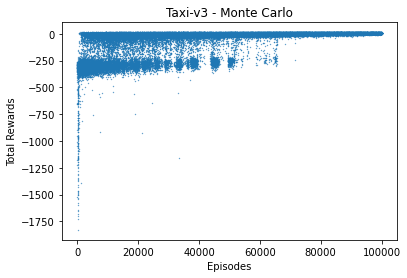

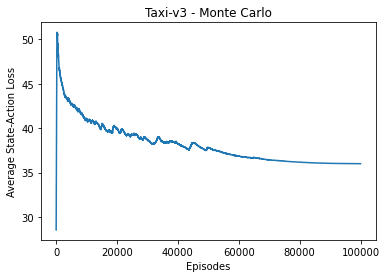

In [120]:
plt.scatter(range(len(eps_returns)), eps_returns, s=0.1)
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Taxi-v3 - Monte Carlo')
plt.show()
plt.plot(eps_q_diff / 3000)
plt.xlabel('Episodes')
plt.ylabel('Average State-Action Loss')
plt.title('Taxi-v3 - Monte Carlo')
plt.show()

In [103]:
def test(delay, limit=None):
    def render(i):
        clear_output(wait=True)
        env.render()
        print(i)
        time.sleep(delay)
    state = env.reset()
    render(0)
    for i in range(limit if limit else sys.maxsize):
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        render(i)
        if done: break
    env.close()
test(0.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
13


In [128]:
x = 0
for state in range(n_states):
    mc_action = np.argmax(q_table[state])
    sole_actions = np.argwhere(sole_q_table[state] == np.amax(sole_q_table[state]))
    if mc_action in sole_actions:
        x += 1
print(x)

358


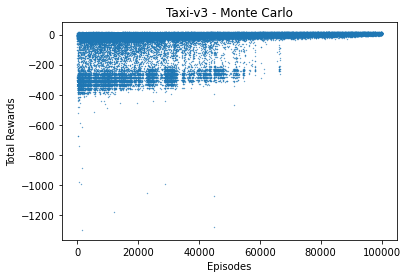

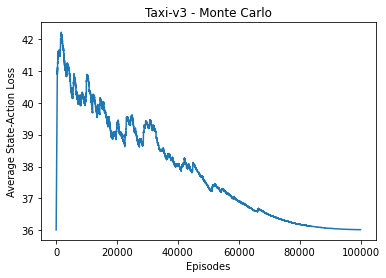

In [130]:
plt.scatter(range(len(eps_returns)), eps_returns, s=0.1)
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Taxi-v3 - Monte Carlo')
plt.show()
plt.plot(eps_q_diff / 3000)
plt.xlabel('Episodes')
plt.ylabel('Average State-Action Loss')
plt.title('Taxi-v3 - Monte Carlo')
plt.show()

In [131]:
x = 0
for state in range(n_states):
    mc_action = np.argmax(q_table[state])
    sole_actions = np.argwhere(sole_q_table[state] == np.amax(sole_q_table[state]))
    if mc_action in sole_actions:
        x += 1
print(x)

362


In [136]:
env.P[16]

{0: [(1.0, 116, -1, False)],
 1: [(1.0, 16, -1, False)],
 2: [(1.0, 36, -1, False)],
 3: [(1.0, 16, -1, False)],
 4: [(1.0, 16, -10, False)],
 5: [(1.0, 0, 20, True)]}